### Data Preprocessing:


In [2]:
# Import 
import pandas as pd
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Import LabelEncoder

from tensorflow import keras
from sklearn.metrics import accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


In [3]:
# Load the dataset
df = pd.read_csv('tai.csv')
df

,label,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x29,y29,x30,y30,x31,y31,x32,y32,x33,y33
0,Tame,259,120,267,108,271,108,275,108,251,...,123,595,489,597,126,606,522,610,109,626
1,Tame,259,120,267,108,271,108,275,108,251,...,123,595,489,597,126,606,522,610,109,626
2,Tame,260,123,271,112,269,108,280,105,250,...,120,592,487,599,131,606,522,605,111,626
3,Tame,254,118,272,106,266,104,271,109,251,...,117,600,490,597,121,611,516,604,113,627
4,Tame,256,125,269,103,275,113,277,113,253,...,125,599,487,598,122,610,517,613,114,628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Taijiquan,393,112,393,101,399,103,409,108,385,...,278,680,465,682,273,692,477,734,392,121
166,Taijiquan,385,119,397,103,396,101,402,107,382,...,275,682,457,686,284,692,477,729,389,121
167,Taijiquan,386,113,404,97,407,104,403,96,388,...,273,676,461,686,276,693,484,737,394,122
168,Taijiquan,391,110,394,94,403,103,409,100,381,...,273,684,465,681,283,688,474,738,390,112


In [4]:
# Check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 67 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   170 non-null    object
 1   x1      170 non-null    int64 
 2   y1      170 non-null    int64 
 3   x2      170 non-null    int64 
 4   y2      170 non-null    int64 
 5   x3      170 non-null    int64 
 6   y3      170 non-null    int64 
 7   x4      170 non-null    int64 
 8   y4      170 non-null    int64 
 9   x5      170 non-null    int64 
 10  y5      170 non-null    int64 
 11  x6      170 non-null    int64 
 12  y6      170 non-null    int64 
 13  x7      170 non-null    int64 
 14  y7      170 non-null    int64 
 15  x8      170 non-null    int64 
 16  y8      170 non-null    int64 
 17  x9      170 non-null    int64 
 18  y9      170 non-null    int64 
 19  x10     170 non-null    int64 
 20  y10     170 non-null    int64 
 21  x11     170 non-null    int64 
 22  y11     170 non-null    in

In [5]:
# Remove missing values
df.dropna(inplace=True)

In [6]:
# Check the null values
df.isnull().sum()

label    0
x1       0
y1       0
x2       0
y2       0
        ..
y31      0
x32      0
y32      0
x33      0
y33      0
Length: 67, dtype: int64

### Calculate Angle Keypoints

In [7]:
def get_angle(frame, keypoint_1, keypoint_2, keypoint_3, keypoint_4):
    a = np.array([frame['x' + str(keypoint_1)], frame['y' + str(keypoint_1)]])
    b = np.array([frame['x' + str(keypoint_2)], frame['y' + str(keypoint_2)]]) 
    c = np.array([frame['x' + str(keypoint_3)], frame['y' + str(keypoint_3)]]) 
    d = np.array([frame['x' + str(keypoint_4)], frame['y' + str(keypoint_4)]]) 

    ba = a - b
    bc = c - b
    cd = d - c
    
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = math.degrees(np.arccos(cosine_angle))
    
    if angle > 180.0:
        angle = 360 - angle
        
    return angle


In [8]:
df['angle1'] = df.apply(lambda row: get_angle(row, 11, 13, 23, 24), axis=1)
df['angle2'] = df.apply(lambda row: get_angle(row, 25, 26, 27, 28), axis=1)


In [9]:
df

,label,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x30,y30,x31,y31,x32,y32,x33,y33,angle1,angle2
0,Tame,259,120,267,108,271,108,275,108,251,...,489,597,126,606,522,610,109,626,141.901751,32.129841
1,Tame,259,120,267,108,271,108,275,108,251,...,489,597,126,606,522,610,109,626,141.901751,32.129841
2,Tame,260,123,271,112,269,108,280,105,250,...,487,599,131,606,522,605,111,626,138.511924,31.893826
3,Tame,254,118,272,106,266,104,271,109,251,...,490,597,121,611,516,604,113,627,139.162435,31.183662
4,Tame,256,125,269,103,275,113,277,113,253,...,487,598,122,610,517,613,114,628,138.824530,32.092523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Taijiquan,393,112,393,101,399,103,409,108,385,...,465,682,273,692,477,734,392,121,135.460981,50.987660
166,Taijiquan,385,119,397,103,396,101,402,107,382,...,457,686,284,692,477,729,389,121,126.179317,54.047526
167,Taijiquan,386,113,404,97,407,104,403,96,388,...,461,686,276,693,484,737,394,122,137.046409,47.508439
168,Taijiquan,391,110,394,94,403,103,409,100,381,...,465,681,283,688,474,738,390,112,128.330571,53.082850


### Model

In [10]:
# Save the dataset to a CSV file
df.to_csv('taijiquan_dataset.csv', index=False)

In [11]:
dataset = pd.read_csv('taijiquan_dataset.csv')
dataset

,label,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x30,y30,x31,y31,x32,y32,x33,y33,angle1,angle2
0,Tame,259,120,267,108,271,108,275,108,251,...,489,597,126,606,522,610,109,626,141.901751,32.129841
1,Tame,259,120,267,108,271,108,275,108,251,...,489,597,126,606,522,610,109,626,141.901751,32.129841
2,Tame,260,123,271,112,269,108,280,105,250,...,487,599,131,606,522,605,111,626,138.511924,31.893826
3,Tame,254,118,272,106,266,104,271,109,251,...,490,597,121,611,516,604,113,627,139.162435,31.183662
4,Tame,256,125,269,103,275,113,277,113,253,...,487,598,122,610,517,613,114,628,138.824530,32.092523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Taijiquan,393,112,393,101,399,103,409,108,385,...,465,682,273,692,477,734,392,121,135.460981,50.987660
166,Taijiquan,385,119,397,103,396,101,402,107,382,...,457,686,284,692,477,729,389,121,126.179317,54.047526
167,Taijiquan,386,113,404,97,407,104,403,96,388,...,461,686,276,693,484,737,394,122,137.046409,47.508439
168,Taijiquan,391,110,394,94,403,103,409,100,381,...,465,681,283,688,474,738,390,112,128.330571,53.082850


In [12]:
# Check if there are any missing values in the dataset
missing_values = dataset.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 label     0
x1        0
y1        0
x2        0
y2        0
         ..
y32       0
x33       0
y33       0
angle1    0
angle2    0
Length: 69, dtype: int64


In [13]:
# Remove rows with missing values
dataset.dropna(inplace=True)

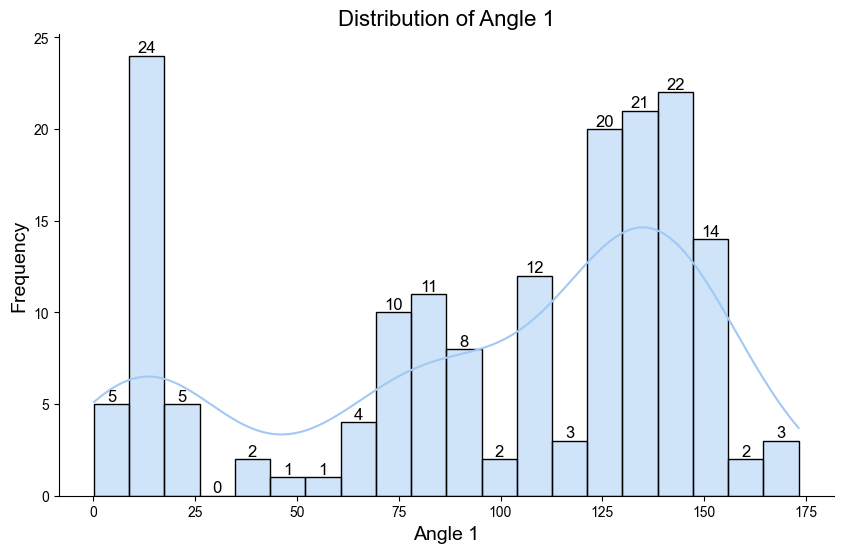

In [14]:
# Set the color palette to 'pastel'
sns.set_palette('pastel')

# Create the histogram plot
plt.figure(figsize=(10, 6))
sns.histplot(dataset['angle1'], bins=20, kde=True)

plt.xlabel('Angle 1', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Angle 1', fontsize=16)

# Annotate each bin with the number of data points
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height())}',
                ha='center', va='bottom', fontsize=12, color='black')

# Customize the style
sns.set_style("whitegrid")  # Use a white grid background
sns.despine()

# Show the plot
plt.show()


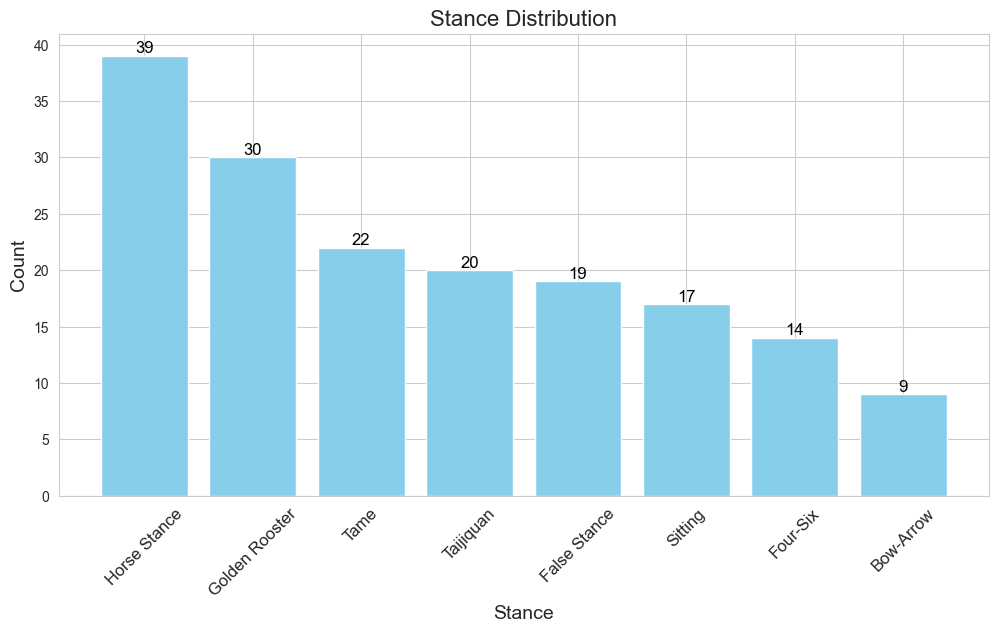

In [15]:

# Assuming you have your dataset loaded as 'dataset'
labels_count = dataset['label'].value_counts()

plt.figure(figsize=(12, 6))  # Set the figure size

# Create a bar chart
plt.bar(labels_count.index, labels_count.values, color='skyblue')

plt.xlabel('Stance', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Stance Distribution', fontsize=16)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)

# Annotate each bar with its count
for x, y in zip(labels_count.index, labels_count.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=12, color='black')

plt.show()


In [16]:
# Data Splitting
features = dataset.iloc[:, 1:-2]  # Exclude 'label', 'angle1', and 'angle2' columns
labels = dataset['label']

In [17]:
print(features.shape)


(170, 66)


In [18]:
print(features.columns)


Index(['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6',
       'x7', 'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10', 'x11', 'y11', 'x12',
       'y12', 'x13', 'y13', 'x14', 'y14', 'x15', 'y15', 'x16', 'y16', 'x17',
       'y17', 'x18', 'y18', 'x19', 'y19', 'x20', 'y20', 'x21', 'y21', 'x22',
       'y22', 'x23', 'y23', 'x24', 'y24', 'x25', 'y25', 'x26', 'y26', 'x27',
       'y27', 'x28', 'y28', 'x29', 'y29', 'x30', 'y30', 'x31', 'y31', 'x32',
       'y32', 'x33', 'y33'],
      dtype='object')


In [19]:

# Encode the labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

### Data Splitting: 11,220


X_train and y_train_encoded to train your machine learning model, and X_test and y_test_encoded to evaluate the model's performance on unseen data.

In [20]:
# Perform train-test split
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)


In [21]:
dataset['label'].unique()

array(['Tame', 'Bow-Arrow', 'False Stance', 'Four-Six', 'Golden Rooster',
       'Horse Stance', 'Sitting', 'Taijiquan'], dtype=object)

In [22]:
print("Size of X_train:", X_train.shape)
print("Size of X_test:", X_test.shape)


Size of X_train: (136, 66)
Size of X_test: (34, 66)


In [23]:
print("Size of y_train_encoded:", y_train_encoded.shape)
print("Size of y_test_encoded:", y_test_encoded.shape)


Size of y_train_encoded: (136,)
Size of y_test_encoded: (34,)


In [24]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
num_classes = len(np.unique(labels_encoded))
print(num_classes)


8


# FNN model using Keras

In [26]:
# Build the FNN model
num_classes = len(np.unique(y_train_encoded))

model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.BatchNormalization())  # Adding Batch Normalization
model.add(keras.layers.Dropout(0.3))  # Adding Dropout
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(num_classes, activation='softmax'))

In [27]:
# Compile the model with different optimizer and learning rate schedule
initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9)
optimizer = keras.optimizers.RMSprop(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [28]:
# Train the model
history = model.fit(X_train_scaled, y_train_encoded, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
4/4 [==============================] - 5s 259ms/step - loss: 2.2478 - accuracy: 0.2130 - val_loss: 1.6404 - val_accuracy: 0.5357
Epoch 2/100
4/4 [==============================] - 0s 20ms/step - loss: 1.5912 - accuracy: 0.4722 - val_loss: 1.4694 - val_accuracy: 0.8571
Epoch 3/100
4/4 [==============================] - 0s 43ms/step - loss: 1.3807 - accuracy: 0.5000 - val_loss: 1.3708 - val_accuracy: 0.9286
Epoch 4/100
4/4 [==============================] - 0s 21ms/step - loss: 1.1370 - accuracy: 0.6389 - val_loss: 1.3117 - val_accuracy: 0.8929
Epoch 5/100
4/4 [==============================] - 0s 20ms/step - loss: 1.0555 - accuracy: 0.7130 - val_loss: 1.2318 - val_accuracy: 0.9286
Epoch 6/100
4/4 [==============================] - 0s 24ms/step - loss: 0.9444 - accuracy: 0.6852 - val_loss: 1.1460 - val_accuracy: 0.9643
Epoch 7/100
4/4 [==============================] - 0s 32ms/step - loss: 0.8004 - accuracy: 0.7315 - val_loss: 1.0722 - val_accuracy: 0.9643
Epoch 8/100
4/4 [==

In [29]:
# Evaluate the model on the test set
X_test_scaled = scaler.transform(X_test)
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

2/2 [==============================] - 0s 6ms/step - loss: 0.4813 - accuracy: 0.9412
Test accuracy: 94.12%


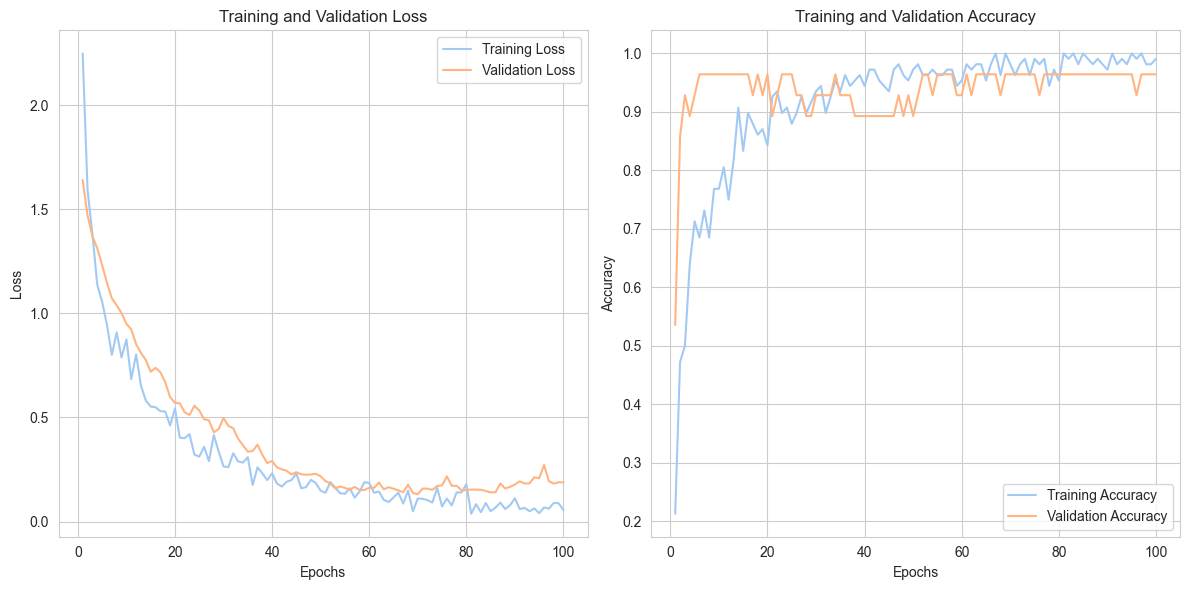

In [30]:
# Extract training history and plot
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss')
plt.plot(range(1, len(validation_loss) + 1), validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, label='Training Accuracy')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [31]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

2/2 [==============================] - 0s 6ms/step


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Make predictions on the test set
y_pred_probabilities = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_encoded, y_pred_classes, average='weighted')
recall = recall_score(y_test_encoded, y_pred_classes, average='weighted')
f1 = f1_score(y_test_encoded, y_pred_classes, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Display a classification report
class_names = label_encoder.classes_
report = classification_report(y_test_encoded, y_pred_classes, target_names=class_names, zero_division=0)
print('Classification Report:')
print(report)


2/2 [==============================] - 0s 6ms/step
Accuracy: 94.12%
Precision: 0.89
Recall: 0.94
F1 Score: 0.91
Classification Report:
                precision    recall  f1-score   support

     Bow-Arrow       0.00      0.00      0.00         2
  False Stance       1.00      1.00      1.00         4
      Four-Six       1.00      1.00      1.00         4
Golden Rooster       1.00      1.00      1.00         5
  Horse Stance       0.86      1.00      0.92         6
       Sitting       1.00      1.00      1.00         3
     Taijiquan       1.00      1.00      1.00         4
          Tame       0.86      1.00      0.92         6

      accuracy                           0.94        34
     macro avg       0.84      0.88      0.86        34
  weighted avg       0.89      0.94      0.91        34



c:\Users\john\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[0 0 0 0 1 0 0 1]
 [0 4 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0]
 [0 0 0 5 0 0 0 0]
 [0 0 0 0 6 0 0 0]
 [0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 6]]


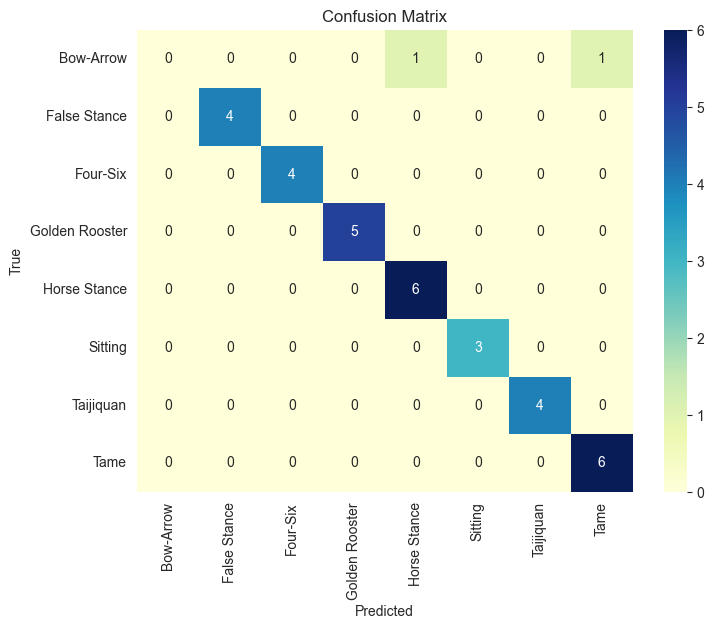

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
confusion = confusion_matrix(y_test_encoded, y_pred_classes)
print(confusion)

# Define class names for the target labels (change as needed)
class_names = ["Bow-Arrow", "False Stance", "Four-Six", "Golden Rooster", "Horse Stance", "Sitting", "Taijiquan", "Tame"]

# Create a Seaborn heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlGnBu', cbar=True,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Display the confusion matrix
plt.show()


In [34]:
# MCC = (TP * TN - FP * FN) / sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))

from sklearn.metrics import confusion_matrix, matthews_corrcoef

mcc = matthews_corrcoef(y_test_encoded, y_pred_classes)
print("MCC:", mcc)


MCC: 0.9342018899898211


In [39]:
from sklearn.model_selection import KFold
import numpy as np
from tensorflow import keras

# Define the number of folds (e.g., k = 10 for 10-fold cross-validation)
k = 10

# Initialize lists to store accuracy results for each fold
accuracy_per_fold = []

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Iterate over the folds
for train_index, val_index in kf.split(X_train_scaled):
    # Split the data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

    num_classes = len(np.unique(y_train_encoded))

    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.BatchNormalization())  # Adding Batch Normalization
    model.add(keras.layers.Dropout(0.3))  # Adding Dropout
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(32, activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(num_classes, activation='softmax'))

    # Compile the model for this fold
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model on the current fold
    history = model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, validation_data=(X_val_fold, y_val_fold), verbose=0)

    # Evaluate the model on the validation set for this fold
    val_loss, val_accuracy = model.evaluate(X_val_fold, y_val_fold)
    accuracy_per_fold.append(val_accuracy)

# Calculate and print the average accuracy across all folds
average_accuracy = sum(accuracy_per_fold) / k
print(f'Average Accuracy: {average_accuracy * 100:.2f}%')


1/1 [==============================] - 0s 42ms/step - loss: 0.0049 - accuracy: 1.0000
Average Accuracy: 93.41%


# Model Save

In [40]:
# Save the model architecture to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights to HDF5
model.save_weights("model_weights.h5")


In [41]:
from keras.models import model_from_json

# Load the model architecture from JSON
with open('model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)

# Load the model weights from HDF5
loaded_model.load_weights("model_weights.h5")

# Compile the loaded model
loaded_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Statistical Testing